In [8]:
%%R
library(faraway)

In [9]:
%%R
df <- na.omit(mammalsleep)

In [10]:
%%R
summary(df)

      body               brain            nondream          dream      
 Min.   :   0.0050   Min.   :   0.14   Min.   : 2.100   Min.   :0.000  
 1st Qu.:   0.3162   1st Qu.:   3.60   1st Qu.: 6.150   1st Qu.:0.900  
 Median :   2.2500   Median :  12.20   Median : 8.500   Median :1.650  
 Mean   : 100.8139   Mean   : 218.68   Mean   : 8.743   Mean   :1.900  
 3rd Qu.:  10.4125   3rd Qu.: 155.50   3rd Qu.:11.000   3rd Qu.:2.375  
 Max.   :2547.0000   Max.   :4603.00   Max.   :17.900   Max.   :6.600  
     sleep          lifespan        gestation       predation    
 Min.   : 2.90   Min.   :  2.00   Min.   : 12.0   Min.   :1.000  
 1st Qu.: 8.05   1st Qu.:  5.25   1st Qu.: 32.0   1st Qu.:2.000  
 Median : 9.80   Median : 11.20   Median : 90.0   Median :3.000  
 Mean   :10.64   Mean   : 19.37   Mean   :129.9   Mean   :2.952  
 3rd Qu.:13.60   3rd Qu.: 27.00   3rd Qu.:195.0   3rd Qu.:4.000  
 Max.   :19.90   Max.   :100.00   Max.   :624.0   Max.   :5.000  
    exposure         danger    
 M

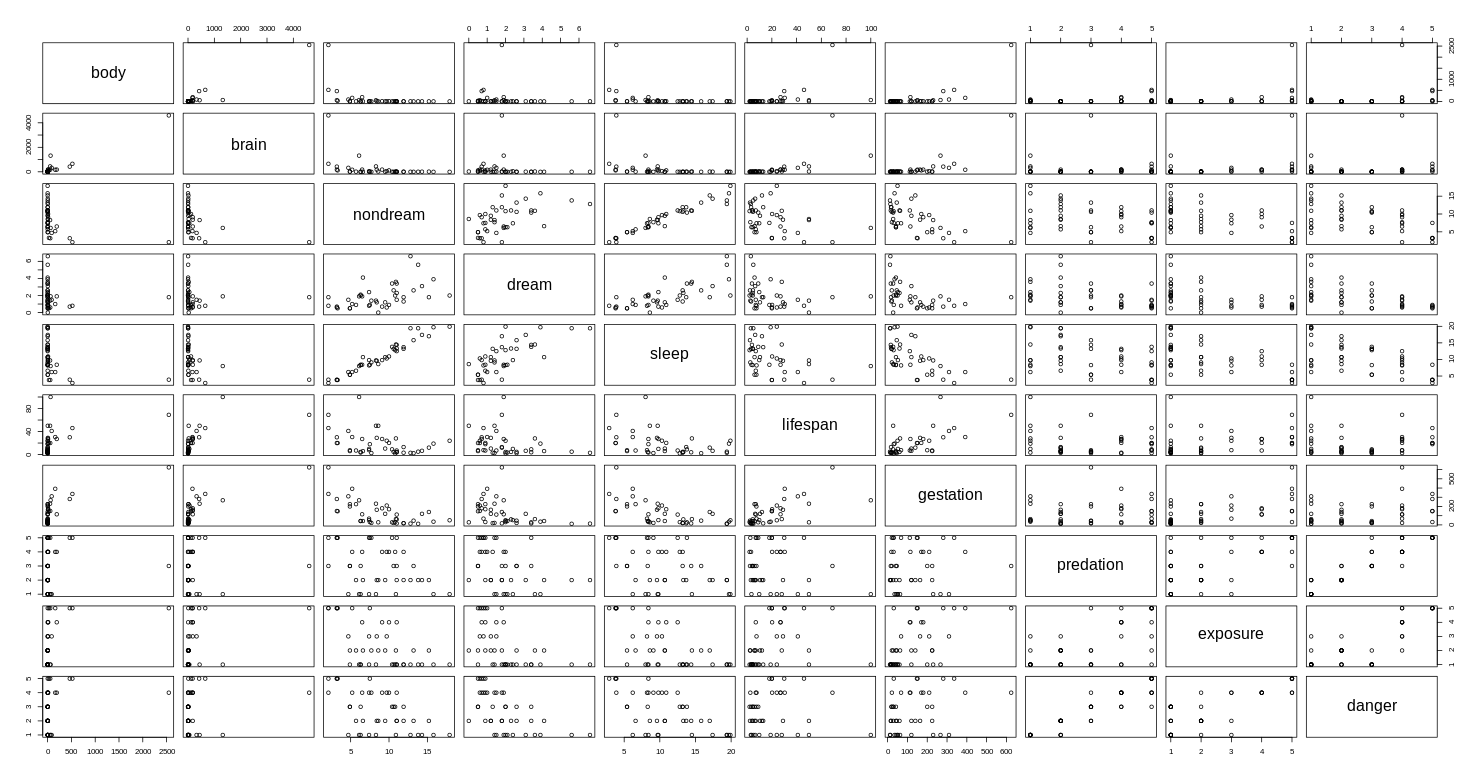

In [13]:
%%R -w 1480 -h 780 -u px
plot(df)

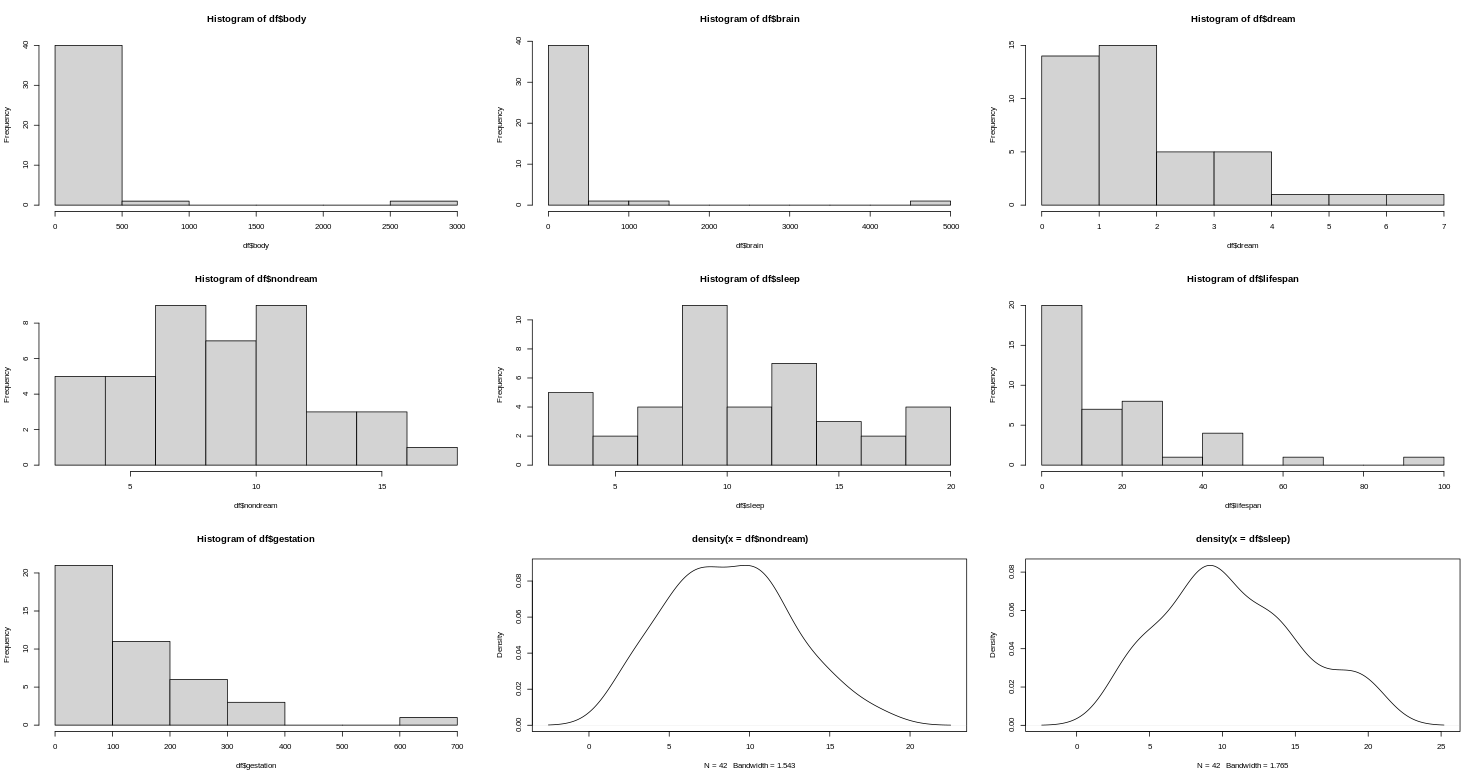

In [14]:
%%R -w 1480 -h 780 -u px
par(mfrow=c(3,3))
hist(df$body)
hist(df$brain)
hist(df$dream)
hist(df$nondream)
hist(df$sleep)
hist(df$lifespan)
hist(df$gestation)
plot(density(df$nondream))
plot(density(df$sleep))

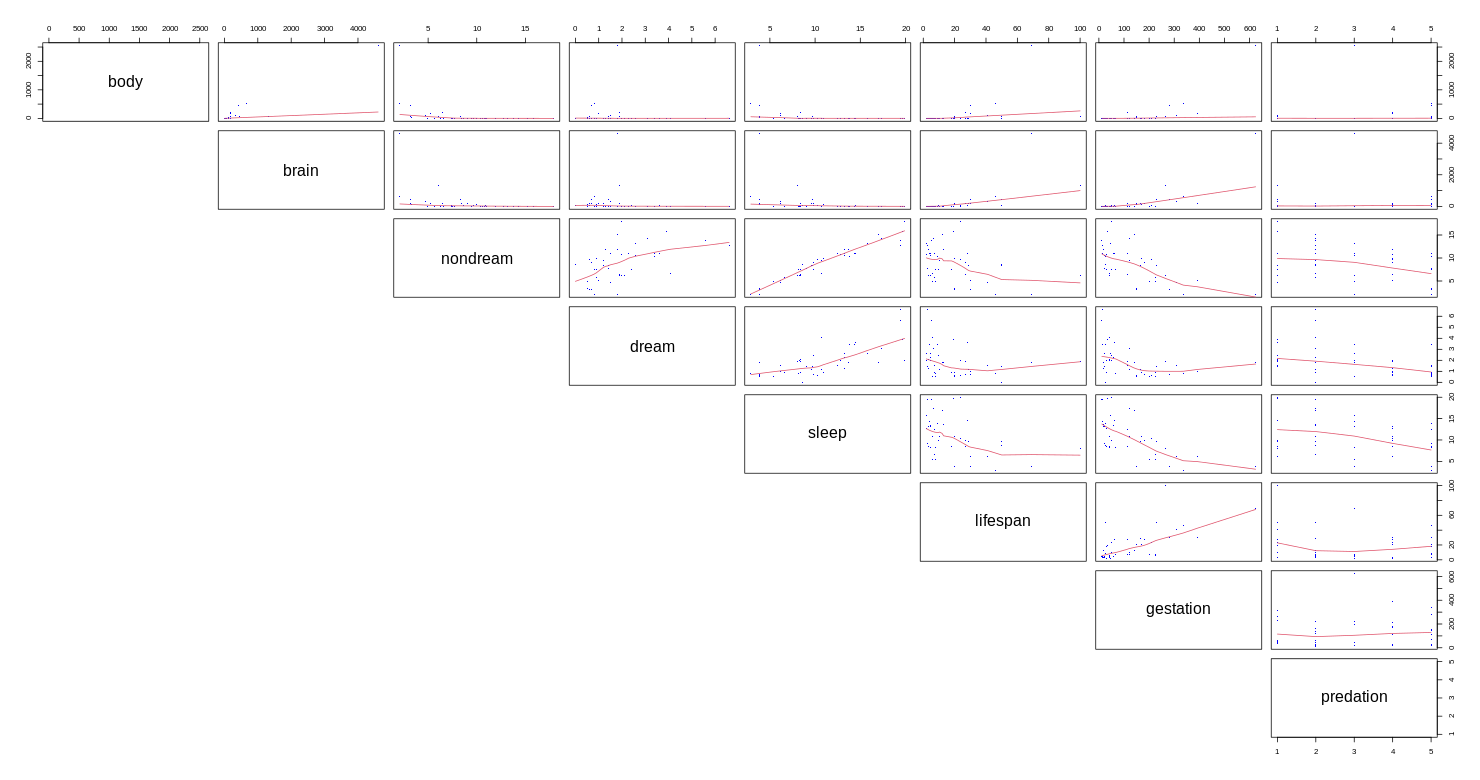

In [15]:
%%R -w 1480 -h 780 -u px
df_c <- df[, c('body', 'brain', 'nondream', 'dream', 'sleep','lifespan','gestation', 'predation')]
pairs(df_c, pch = '.', upper.panel = panel.smooth, lower.panel = NULL,  col = 'blue')

In [ ]:
%%R
round(cor(df$predation,df$sleep),3)

[1] -0.405


In [ ]:
%%R
round(cor(df$lifespan,df$gestation),3)

[1] 0.646


In [ ]:
%%R
round(cor(df_c), 3)

            body  brain  dream  sleep lifespan gestation predation
body       1.000  0.956 -0.075 -0.343    0.470     0.714     0.096
brain      0.956  1.000 -0.074 -0.337    0.629     0.734    -0.015
dream     -0.075 -0.074  1.000  0.717   -0.268    -0.409    -0.398
sleep     -0.343 -0.337  0.717  1.000   -0.382    -0.614    -0.405
lifespan   0.470  0.629 -0.268 -0.382    1.000     0.646    -0.170
gestation  0.714  0.734 -0.409 -0.614    0.646     1.000     0.091
predation  0.096 -0.015 -0.398 -0.405   -0.170     0.091     1.000


In [ ]:
%%R
cor.test( ~ lifespan + gestation, data =df_c)


	Pearson's product-moment correlation

data:  lifespan and gestation
t = 5.3579, df = 40, p-value = 3.762e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4261846 0.7942779
sample estimates:
      cor 
0.6463887 



In [ ]:
%%R
rcorr(as.matrix(df_c), type="pearson")

           body brain nondream dream sleep lifespan gestation predation
body       1.00  0.96    -0.39 -0.07 -0.34     0.47      0.71      0.10
brain      0.96  1.00    -0.39 -0.07 -0.34     0.63      0.73     -0.02
nondream  -0.39 -0.39     1.00  0.52  0.97    -0.37     -0.61     -0.35
dream     -0.07 -0.07     0.52  1.00  0.72    -0.27     -0.41     -0.40
sleep     -0.34 -0.34     0.97  0.72  1.00    -0.38     -0.61     -0.40
lifespan   0.47  0.63    -0.37 -0.27 -0.38     1.00      0.65     -0.17
gestation  0.71  0.73    -0.61 -0.41 -0.61     0.65      1.00      0.09
predation  0.10 -0.02    -0.35 -0.40 -0.40    -0.17      0.09      1.00

n= 42 


P
          body   brain  nondream dream  sleep  lifespan gestation predation
body             0.0000 0.0099   0.6374 0.0262 0.0017   0.0000    0.5458   
brain     0.0000        0.0114   0.6401 0.0290 0.0000   0.0000    0.9230   
nondream  0.0099 0.0114          0.0004 0.0000 0.0152   0.0000    0.0220   
dream     0.6374 0.6401 0.0004      

In [41]:
%%R
model <- lm(sleep ~ predation, data=df_c)
summary(model)


Call:
lm(formula = sleep ~ predation, data = df_c)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0136 -3.9134  0.3533  3.7490  7.5031 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  14.5304     1.5432   9.416 1.06e-11 ***
predation    -1.3167     0.4704  -2.799  0.00785 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.36 on 40 degrees of freedom
Multiple R-squared:  0.1638,	Adjusted R-squared:  0.1429 
F-statistic: 7.835 on 1 and 40 DF,  p-value: 0.007849



In [42]:
%%R
model1 <- lm(sleep ~ predation  + gestation, data=df_c)
summary(model1)


Call:
lm(formula = sleep ~ predation + gestation, data = df_c)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3648 -2.6158 -0.7169  2.5257  5.4829 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16.810765   1.287423  13.058 8.10e-16 ***
predation   -1.144655   0.369789  -3.095  0.00363 ** 
gestation   -0.021459   0.004187  -5.125 8.43e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.413 on 39 degrees of freedom
Multiple R-squared:  0.5003,	Adjusted R-squared:  0.4747 
F-statistic: 19.53 on 2 and 39 DF,  p-value: 1.331e-06



In [43]:
%%R
model2 <- lm(sleep ~ predation + gestation + I(gestation^2), data=df_c)
summary(model2)


Call:
lm(formula = sleep ~ predation + gestation + I(gestation^2), 
    data = df_c)

Residuals:
   Min     1Q Median     3Q    Max 
-6.662 -2.201 -0.368  2.655  6.103 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1.768e+01  1.361e+00  12.991 1.49e-15 ***
predation      -1.116e+00  3.619e-01  -3.085 0.003786 ** 
gestation      -3.709e-02  1.019e-02  -3.641 0.000806 ***
I(gestation^2)  3.291e-05  1.964e-05   1.676 0.102033    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.337 on 38 degrees of freedom
Multiple R-squared:  0.5347,	Adjusted R-squared:  0.498 
F-statistic: 14.56 on 3 and 38 DF,  p-value: 1.82e-06



In [44]:
%%R
model3 <- lm(sleep ~ predation + lifespan , data=df_c)
summary(model3)


Call:
lm(formula = sleep ~ predation + lifespan, data = df_c)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0285 -2.4009  0.0483  2.3845  6.6854 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  17.3797     1.5662  11.097 1.24e-13 ***
predation    -1.5733     0.4185  -3.759 0.000558 ***
lifespan     -0.1080     0.0299  -3.611 0.000858 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.822 on 39 degrees of freedom
Multiple R-squared:  0.3734,	Adjusted R-squared:  0.3412 
F-statistic: 11.62 on 2 and 39 DF,  p-value: 0.0001101



In [45]:
%%R
model4 <- lm(sleep ~ predation + lifespan + gestation, data=df_c)
summary(model4)


Call:
lm(formula = sleep ~ predation + lifespan + gestation, data = df_c)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7355 -2.5828 -0.3111  2.4996  5.5024 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 17.247161   1.405817  12.268  8.7e-15 ***
predation   -1.237513   0.389583  -3.177  0.00296 ** 
lifespan    -0.028808   0.036334  -0.793  0.43277    
gestation   -0.018413   0.005697  -3.232  0.00254 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.43 on 38 degrees of freedom
Multiple R-squared:  0.5085,	Adjusted R-squared:  0.4697 
F-statistic:  13.1 on 3 and 38 DF,  p-value: 5.047e-06



In [46]:
%%R
model5 <- lm(sleep ~ predation + I(lifespan^2) + I(lifespan*gestation) + I(gestation^2), data=df_c)
summary(model5)


Call:
lm(formula = sleep ~ predation + I(lifespan^2) + I(lifespan * 
    gestation) + I(gestation^2), data = df_c)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3616 -3.1091  0.0748  2.5973  6.0167 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.625e+01  1.463e+00  11.112  2.4e-13 ***
predation               -1.424e+00  4.279e-01  -3.328  0.00199 ** 
I(lifespan^2)           -1.837e-03  1.218e-03  -1.508  0.13992    
I(lifespan * gestation)  5.945e-04  5.302e-04   1.121  0.26938    
I(gestation^2)          -7.454e-05  4.540e-05  -1.642  0.10906    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.775 on 37 degrees of freedom
Multiple R-squared:  0.4202,	Adjusted R-squared:  0.3575 
F-statistic: 6.703 on 4 and 37 DF,  p-value: 0.0003668



In [38]:
%%R
require(MASS)

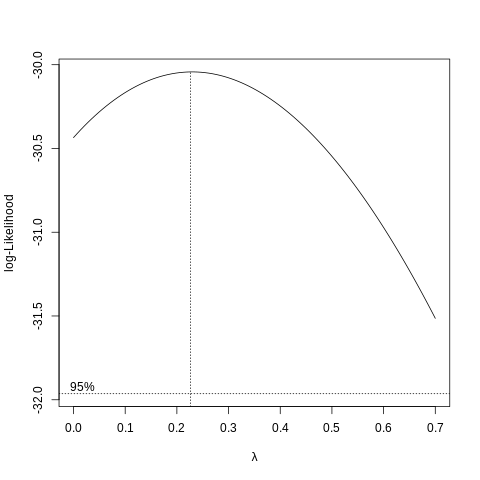

In [39]:
%%R
boxcox(model1,plotit=T, lambda = seq(0,.7,by=.1))

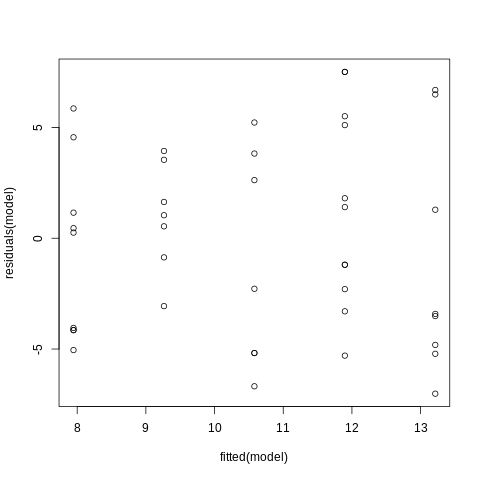

In [32]:
%%R
plot(residuals(model)~fitted(model))

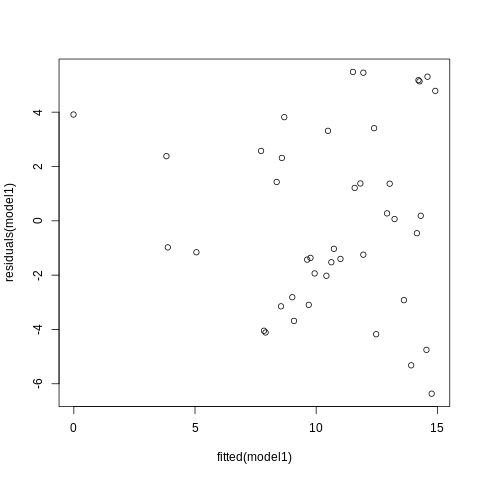

In [17]:
%%R
plot(residuals(model1)~fitted(model1))

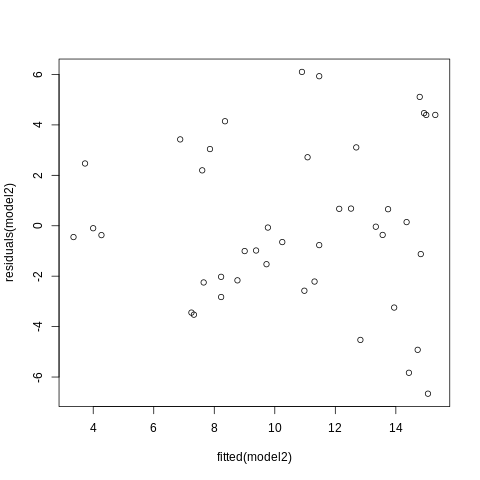

In [ ]:
%%R
plot(residuals(model2)~fitted(model2))

In [47]:
%%R
model_new <- lm(5*sleep^(1/5) -1 ~ predation + gestation, data=df_c)
summary(model_new)


Call:
lm(formula = 5 * sleep^(1/5) - 1 ~ predation + gestation, data = df_c)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.93680 -0.37225 -0.02879  0.50011  0.78206 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.9378509  0.1939322  40.931  < 2e-16 ***
predation   -0.1892217  0.0557035  -3.397  0.00158 ** 
gestation   -0.0037841  0.0006307  -6.000 5.18e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5142 on 39 degrees of freedom
Multiple R-squared:  0.5698,	Adjusted R-squared:  0.5478 
F-statistic: 25.83 on 2 and 39 DF,  p-value: 7.177e-08



In [48]:
%%R
model_new1 <- lm(5*sleep^(1/5) -1 ~ predation + gestation + I(gestation^2), data=df_c)
summary(model_new1)


Call:
lm(formula = 5 * sleep^(1/5) - 1 ~ predation + gestation + I(gestation^2), 
    data = df_c)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.97682 -0.29491  0.00724  0.44234  0.86563 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     8.055e+00  2.065e-01  39.009  < 2e-16 ***
predation      -1.854e-01  5.491e-02  -3.376 0.001705 ** 
gestation      -5.892e-03  1.546e-03  -3.812 0.000492 ***
I(gestation^2)  4.437e-06  2.980e-06   1.489 0.144756    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5063 on 38 degrees of freedom
Multiple R-squared:  0.5935,	Adjusted R-squared:  0.5615 
F-statistic:  18.5 on 3 and 38 DF,  p-value: 1.464e-07



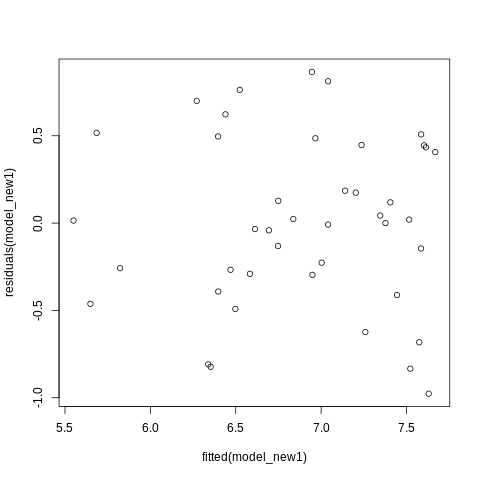

In [49]:
%%R
plot(residuals(model_new1)~fitted(model_new1))

In [50]:
%%R
model_new2 <- lm(5*sleep^(1/5) -1 ~ predation + gestation + lifespan + I(gestation^2) + I(lifespan^2) +I(gestation*lifespan),data=df_c)
summary(model_new2)


Call:
lm(formula = 5 * sleep^(1/5) - 1 ~ predation + gestation + lifespan + 
    I(gestation^2) + I(lifespan^2) + I(gestation * lifespan), 
    data = df_c)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.06397 -0.31770 -0.01788  0.39115  0.80800 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              8.157e+00  2.368e-01  34.446  < 2e-16 ***
predation               -2.018e-01  5.944e-02  -3.394  0.00173 ** 
gestation               -5.197e-03  1.764e-03  -2.946  0.00569 ** 
lifespan                -7.463e-03  1.244e-02  -0.600  0.55241    
I(gestation^2)          -1.648e-06  7.162e-06  -0.230  0.81935    
I(lifespan^2)           -1.092e-04  1.905e-04  -0.573  0.57022    
I(gestation * lifespan)  6.858e-05  7.413e-05   0.925  0.36128    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5178 on 35 degrees of freedom
Multiple R-squared:  0.6084,	Adjusted R-squared:  0.5413 
F-st

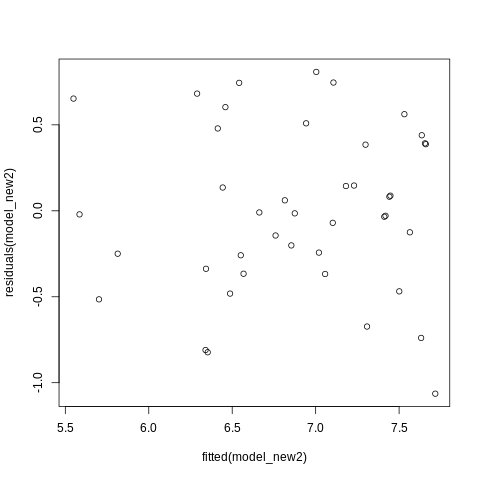

In [26]:
%%R
plot(residuals(model_new2)~fitted(model_new2))

In [ ]:
|%%R
AIC(model)

[1] 246.8291


In [ ]:
%%R
AIC(model1)

[1] 227.2016


In [ ]:
%%R
AIC(model2)

[1] 226.2078


In [27]:
%%R
AIC(model_new)

[1] 68.19888


In [28]:
%%R
AIC(model_new1)

[1] 67.81738


In [29]:
%%R
AIC(model_new2)

[1] 72.25244


### Since the AIC of new model 1 is the smallest out of the tranformed models it demonstrates how well your model fits the data set without over fitting

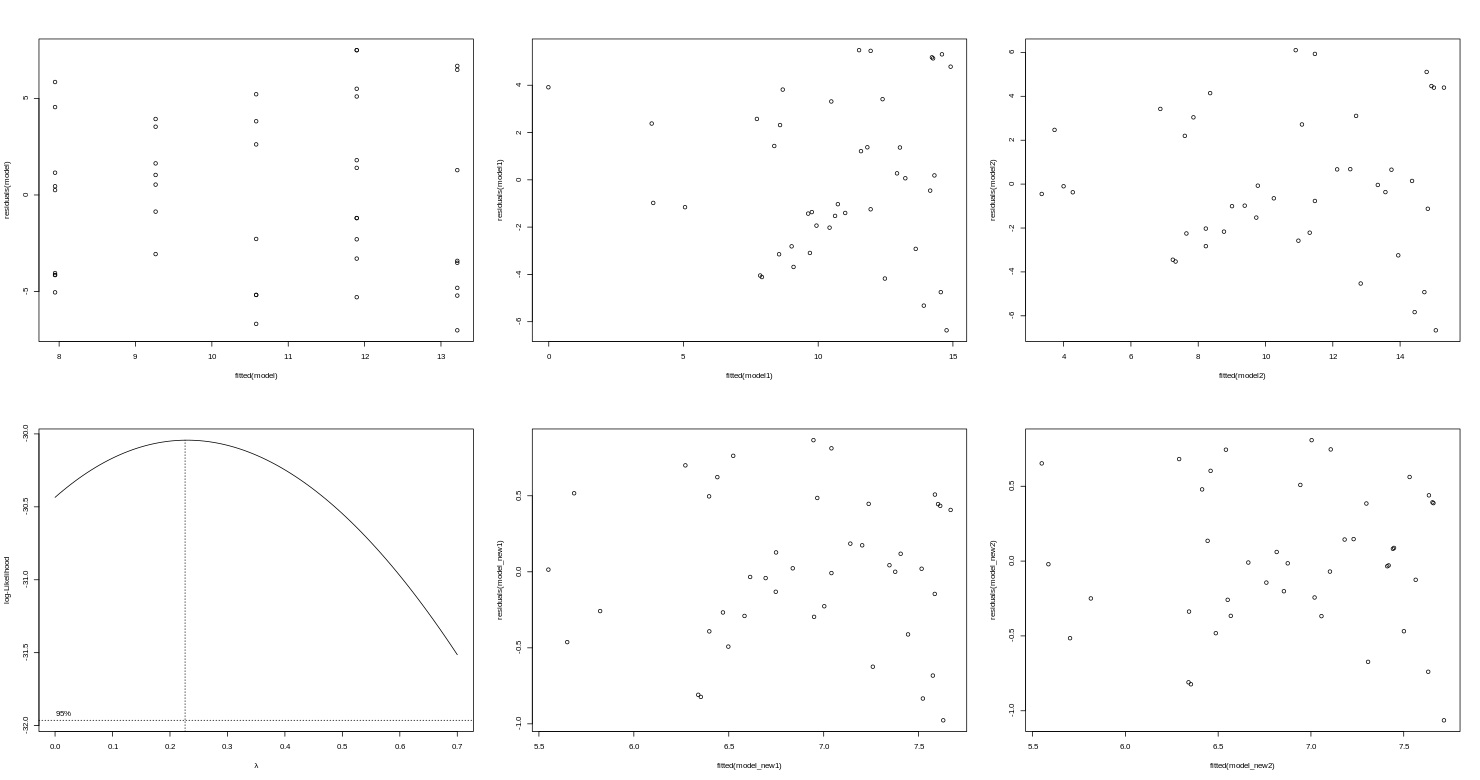

In [51]:
%%R -w 1480 -h 780 -u px
par(mfrow=c(2,3))
plot(residuals(model)~fitted(model))
plot(residuals(model1)~fitted(model1))
plot(residuals(model2)~fitted(model2))
boxcox(model1,plotit=T, lambda = seq(0,.7,by=.1))
plot(residuals(model_new1)~fitted(model_new1))
plot(residuals(model_new2)~fitted(model_new2))